# Gdal/Rasterio Playground
Date: 11-16-2018 (Frdiay)

1. Good gdal documentation on the outputs of `gdalinfo` and `transform` matrix
    - [here](http://download.osgeo.org/gdal/workshop/foss4ge2015/workshop_gdal.html#__RefHeading__5901_1333016408)

2. Rasterio resources
    - [1]()
    - [2]()

Caution: it's not recommended to import osgeo.gdal and rasterio in the same kernel.

In [10]:
from pathlib import Path
import numpy as np
rgb_path = Path('/home/hayley/Data_Spacenet/SpaceNet_Roads_Sample/AOI_2_Vegas_Roads_Sample/RGB-PanSharpen/RGB-PanSharpen_AOI_2_Vegas_img1454.tif')
vec_path = Path('/home/hayley/Data_Spacenet/SpaceNet_Roads_Sample/AOI_2_Vegas_Roads_Sample/geojson/spacenetroads/spacenetroads_AOI_2_Vegas_img1454.geojson')
buffer_path = '/home/hayley/Data_Spacenet/SpaceNet_Roads_Sample/AOI_2_Vegas_Roads_Sample/geojson/buffer/buffer_AOI_2_Vegas_img1454.geojson'


## Gdal

In [11]:
from osgeo import gdal

In [12]:
ds = gdal.Open(str(rgb_path))


In [13]:
gt = ds.GetGeoTransform()
print(gt)
gt_np = np.array(gt).reshape(2,3)
print(gt_np)


(-115.1671176, 2.699999999993434e-06, 0.0, 36.1247876997, 0.0, -2.6999999999988997e-06)
[[ -1.15167118e+02   2.70000000e-06   0.00000000e+00]
 [  3.61247877e+01   0.00000000e+00  -2.70000000e-06]]


In [14]:
ds.RasterXSize

1300

In [15]:
print("upper left in CRS: ", gdal.ApplyGeoTransform(gt, 0, 0))
print("lower left in CRS: ", gdal.ApplyGeoTransform(gt, 0, ds.RasterYSize-1))
print("lower right in CRS: ", gdal.ApplyGeoTransform(gt, ds.RasterXSize-1, ds.RasterYSize-1))
print("upper right in CRS: ", gdal.ApplyGeoTransform(gt, ds.RasterXSize-1,0))

print("lower right in CRS: ", gdal.ApplyGeoTransform(gt, ds.RasterXSize, ds.RasterYSize))


upper left in CRS:  [-115.1671176, 36.1247876997]
lower left in CRS:  [-115.1671176, 36.121280399700005]
lower right in CRS:  [-115.1636103, 36.121280399700005]
upper right in CRS:  [-115.1636103, 36.1247876997]
lower right in CRS:  [-115.1636076, 36.1212776997]


In [16]:
ds2 = gdal.Open('./data/osgeo-workshop/geomatrix.tif')

In [17]:
!gdalinfo './data/osgeo-workshop/geomatrix.tif'

Driver: GTiff/GeoTIFF
Files: ./data/osgeo-workshop/geomatrix.tif
Size is 20, 20
Coordinate System is:
PROJCS["WGS 84 / UTM zone 11N",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",-117],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["EPSG","32611"]]
GeoTransform =
  1841001.75, 1.5, -5
  1144003.25, -5, -1.5
Metadata:
  AREA_OR_POINT=Point
Image Structure Metadata:
  INTERLEAV

In [18]:
!gdalinfo '/home/hayley/mercator.tif'

Driver: GTiff/GeoTIFF
Files: /home/hayley/mercator.tif
Size is 1158, 1428
Coordinate System is:
PROJCS["unnamed",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0],
        UNIT["degree",0.0174532925199433],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Mercator_1SP"],
    PARAMETER["central_meridian",0],
    PARAMETER["scale_factor",1],
    PARAMETER["false_easting",0],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]]]
Origin = (-12833239.023979641497135,4298876.683791127055883)
Pixel Size = (0.337450527159042,-0.337450527159042)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  INTERLEAVE=PIXEL
Corner Coordinates:
Upper Left  (-12833239.024, 4298876.684) (115d16'58.61"W, 36d10'13.50"N)
Lower Left  (-12833239.024, 4298394.804) (115d16'58.61"W, 36d10' 0.87"N)
Upper Right (-

In [19]:
!gdal_translate -of GIF ./data/osgeo-workshop/wellington_west.png ./wellington_west.gif

Input file size is 1831, 1835
0...10...20...30...40...50...60...70...80...90...100 - done.


In [20]:
!gdalinfo -noct ./data/osgeo-workshop/wellington_west.png

Driver: PNG/Portable Network Graphics
Files: ./data/osgeo-workshop/wellington_west.png
       ./data/osgeo-workshop/wellington_west.wld
Size is 1831, 1835
Coordinate System is `'
Origin = (1731543.836827248800546,5461586.738620690070093)
Pixel Size = (28.001501693600002,-28.001034482800002)
Corner Coordinates:
Upper Left  ( 1731543.837, 5461586.739) 
Lower Left  ( 1731543.837, 5410204.840) 
Upper Right ( 1782814.586, 5461586.739) 
Lower Right ( 1782814.586, 5410204.840) 
Center      ( 1757179.212, 5435895.789) 
Band 1 Block=1831x1 Type=Byte, ColorInterp=Palette
  Color Table (RGB with 256 entries)


In [21]:
!cat ./data/osgeo-workshop/wellington_west.wld

28.0015016936
0.0000000000
0.0000000000
-28.0010344828
1731557.8375780955
5461572.7381034484


In [22]:
!gdal_translate -a_srs EPSG:2193 ./data/osgeo-workshop/wellington_west.png wellington_west.tif

Input file size is 1831, 1835
0...10...20...30...40...50...60...70...80...90...100 - done.


In [23]:
!gdalinfo -noct wellington_west.tif


Driver: GTiff/GeoTIFF
Files: wellington_west.tif
Size is 1831, 1835
Coordinate System is:
PROJCS["NZGD2000 / New Zealand Transverse Mercator 2000",
    GEOGCS["NZGD2000",
        DATUM["New_Zealand_Geodetic_Datum_2000",
            SPHEROID["GRS 1980",6378137,298.257222101,
                AUTHORITY["EPSG","7019"]],
            TOWGS84[0,0,0,0,0,0,0],
            AUTHORITY["EPSG","6167"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4167"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",173],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",1600000],
    PARAMETER["false_northing",10000000],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AUTHORITY["EPSG","2193"]]
Origin = (1731543.836827248800546,5461586.738620690070093)
Pixel Size = (28.001501693600002,-28.0010

In [24]:
import cv2
import matplotlib.pyplot as plt

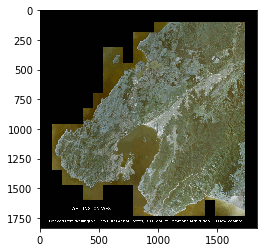

In [25]:
im = cv2.imread('wellington_west.tif')
plt.imshow(im)

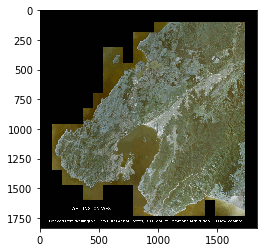

In [26]:
im_png = cv2.imread('./data/osgeo-workshop/wellington_west.png')
plt.imshow(im_png)

In [27]:
!gdal_translate -ot Byte -of PNG -scale $rgb_path ./8bits.png

Input file size is 1300, 1300
0...10...20...30...40...50...60...70...80...90...100 - done.


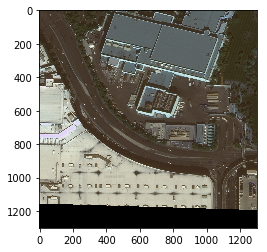

In [28]:
temp = cv2.imread('8bits.png')
plt.imshow(temp)

### Vector data: `ogr`

In [29]:
from osgeo import ogr


orginfo
- `-ro`: read-only
- `-so`: summary-only
    - provides extra informatio such as `number of features`, `spatial extent` in (xmin, ymin) – (xmax, ymax) format, `coordinate system`, `list of attributes` with their name, `type` and `width.precision`
- `-al`: all-layers

In [30]:
!ogrinfo -so -al $vec_path 

INFO: Open of `/home/hayley/Data_Spacenet/SpaceNet_Roads_Sample/AOI_2_Vegas_Roads_Sample/geojson/spacenetroads/spacenetroads_AOI_2_Vegas_img1454.geojson'
      using driver `GeoJSON' successful.

Layer name: spacenetroads_AOI_2_Vegas_img1454
Geometry: Line String
Feature Count: 23
Extent: (-115.167118, 36.121577) - (-115.163608, 36.124788)
Layer SRS WKT:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0,
        AUTHORITY["EPSG","8901"]],
    UNIT["degree",0.0174532925199433,
        AUTHORITY["EPSG","9122"]],
    AUTHORITY["EPSG","4326"]]
bridge_typ: String (0.0)
heading: String (0.0)
lane_numbe: String (0.0)
lane_number: String (0.0)
one_way_ty: String (0.0)
paved: String (0.0)
road_id: Integer (0.0)
road_type: String (0.0)
origarea: Integer (0.0)
origlen: Real (0.0)
partialDec: Integer (0.0)
truncated: Integer (0.0)


With Python API, we can get the similar information.

In [31]:
ds = ogr.Open(str(vec_path))
print("number of layers: ", ds.GetLayerCount())

number of layers:  1


In [32]:
lyr = ds.GetLayerByIndex(0) #here index is 0-based unlike gdal's band indexing (1-based)
print(lyr.GetLayerDefn())

<osgeo.ogr.FeatureDefn; proxy of <Swig Object of type 'OGRFeatureDefnShadow *' at 0x7fca844b0990> >


In [33]:
for feat in lyr:
    print("Feature: ", feat.GetFID())
    for i in range(feat.GetFieldCount()):
        if feat.IsFieldSet(i):
            print('Field is ', feat.GetFieldDefnRef(i).GetName())
            print(str(feat.GetField(i)))
#     pdb.set_trace()
    geom = feat.GetGeometryRef()
    if geom is not None:
        print('Geometry: ', geom.ExportToWkt()[0:20]) # truncated geometry
        

Feature:  0
Field is  bridge_typ
2
Field is  heading
0
Field is  lane_numbe
4
Field is  lane_number
4
Field is  one_way_ty
2
Field is  paved
1
Field is  road_id
11639
Field is  road_type
2
Field is  origarea
0
Field is  origlen
0.000460641540415
Field is  partialDec
1
Field is  truncated
0
Geometry:  LINESTRING (-115.164
Feature:  1
Field is  bridge_typ
2
Field is  heading
0
Field is  lane_numbe
3
Field is  lane_number
3
Field is  one_way_ty
2
Field is  paved
1
Field is  road_id
22733
Field is  road_type
2
Field is  origarea
0
Field is  origlen
0.00862475859837
Field is  partialDec
1
Field is  truncated
0
Geometry:  LINESTRING (-115.164
Feature:  2
Field is  bridge_typ
2
Field is  heading
0
Field is  lane_numbe
3
Field is  lane_number
3
Field is  one_way_ty
2
Field is  paved
1
Field is  road_id
7187
Field is  road_type
2
Field is  origarea
0
Field is  origlen
0.00071337076517
Field is  partialDec
1
Field is  truncated
0
Geometry:  LINESTRING (-115.164
Feature:  3
Field is  bridge_typ
2

In [34]:
!ogrinfo -so -al $buffer_path

INFO: Open of `/home/hayley/Data_Spacenet/SpaceNet_Roads_Sample/AOI_2_Vegas_Roads_Sample/geojson/buffer/buffer_AOI_2_Vegas_img1454.geojson'
      using driver `GeoJSON' successful.

Layer name: buffer_AOI_2_Vegas_img1454
Geometry: Polygon
Feature Count: 23
Extent: (-115.167234, 36.121450) - (-115.163491, 36.124882)
Layer SRS WKT:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0,
        AUTHORITY["EPSG","8901"]],
    UNIT["degree",0.0174532925199433,
        AUTHORITY["EPSG","9122"]],
    AUTHORITY["EPSG","4326"]]
bridge_type: Integer (0.0)
lane_number: Integer (0.0)
one_way_type: Integer (0.0)
paved: Integer (0.0)
road_id: Integer (0.0)
road_type: Integer (0.0)
radius: Real (0.0)


## Vector to Raster: `gdal_rasterize`
[documentation](https://gdal.org/1.11/gdal_rasterize.html)

  - the vector file and the raster must be in the same coordinate system

In [35]:
!gdalinfo 8bits.png

Driver: PNG/Portable Network Graphics
Files: 8bits.png
       8bits.png.aux.xml
Size is 1300, 1300
Coordinate System is:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433],
    AUTHORITY["EPSG","4326"]]
Origin = (-115.167117599999997,36.124787699700001)
Pixel Size = (0.000002700000000,-0.000002700000000)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  INTERLEAVE=PIXEL
Corner Coordinates:
Upper Left  (-115.1671176,  36.1247877) (115d10' 1.62"W, 36d 7'29.24"N)
Lower Left  (-115.1671176,  36.1212777) (115d10' 1.62"W, 36d 7'16.60"N)
Upper Right (-115.1636076,  36.1247877) (115d 9'48.99"W, 36d 7'29.24"N)
Lower Right (-115.1636076,  36.1212777) (115d 9'48.99"W, 36d 7'16.60"N)
Center      (-115.1653626,  36.1230327) (115d 9'55.31"W, 36d 7'22.92"N)
Band 1 Block=1300x1 Type=Byte, ColorInterp=Red
Band 2 Block=13

In [36]:
!gdal_rasterize -burn 255  -l buffer_AOI_2_Vegas_img1454 -ts 1300 1300 -ot Byte $buffer_path ./buffer_raster.tif

0...10...20...30...40...50...60...70...80...90...100 - done.


In [37]:
buff_raster = cv2.imread('./buffer_raster.tif',-1)


In [38]:
buff_raster.max()

255

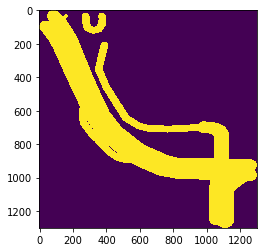

In [39]:
plt.imshow(buff_raster)

## IPython Widget Basics

### TODO: Use leaflet widget to interactively toggle these images for visual comparison: add three layers. one for the original map the other for thi buffer raster and another one with the osm basemap

In [40]:
import ipywidgets as widgets

In [41]:
widgets.IntSlider(min=0, max=10)

IntSlider(value=0, max=10)

In [42]:
from IPython.display import display
w = widgets.IntSlider(0,100)
display(w)

IntSlider(value=100, min=100)

In [43]:
display(w)

IntSlider(value=100, min=100)

In [44]:
w.close()

In [45]:
w = widgets.IntSlider()
display(w)

IntSlider(value=0)

In [46]:
w.value = 23

In [47]:
w.keys

['_view_name',
 'style',
 'layout',
 'orientation',
 'min',
 '_dom_classes',
 'max',
 '_model_name',
 '_view_module',
 '_model_module_version',
 'value',
 '_view_count',
 'disabled',
 '_view_module_version',
 'step',
 'continuous_update',
 'readout_format',
 'description_tooltip',
 'readout',
 '_model_module',
 'description']

In [48]:
display(w)

IntSlider(value=23)

In [49]:
w.description

u''

### Using `interact` function of `ipywidgets`

In [50]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

1. Basic `interact`
At the basic level. `interact` autogenerates UI controls for function arguments, and then calls the function with those arguments when you manipulate the controls interactively.  To use `interact`, we need to define a function that we want to explore.  Let's take a look at this function that has two arguments, `x`, and `y`.

In [51]:
def f(x,y): return np.cos(x) + np.sin(y)
print(f(10,10))

-1.38309263997


In [52]:
interact(f,x=widgets.FloatSlider(min=-10, max=10, value=0),y=fixed(10))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTAuMCwgZGVzY3JpcHRpb249dSd4JywgbWF4PTEwLjAsIG1pbj0tMTAuMCksIE91dHB1dCgpKSwgX2RvbV9jbGFzc2VzPSjigKY=


<function __main__.f>

In [53]:
interact(f, x=(-10.,10.,0.1), y=fixed(0))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTAuMCwgZGVzY3JpcHRpb249dSd4JywgbWF4PTEwLjAsIG1pbj0tMTAuMCksIE91dHB1dCgpKSwgX2RvbV9jbGFzc2VzPSjigKY=


<function __main__.f>

### Using `interactive` function to get the widget returned 

In [54]:
from IPython.display import display

In [55]:
def f(a,b):
    display(a+b)
    return a+b


In [56]:
w = interactive(f, a=(-1., 5.,0.2), b=(-10., 10., 0.3))

In [57]:
display(w)

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTIuMCwgZGVzY3JpcHRpb249dSdhJywgbWF4PTUuMCwgbWluPS0xLjAsIHN0ZXA9MC4yKSwgRmxvYXRTbGlkZXIodmFsdWXigKY=


In [58]:
w.children

(FloatSlider(value=2.0, description=u'a', max=5.0, min=-1.0, step=0.2),
 FloatSlider(value=-0.09999999999999964, description=u'b', max=10.0, min=-10.0, step=0.3),
 Output())

In [59]:
w.kwargs

{'a': 2.0, 'b': -0.09999999999999964}

In [60]:
w.result

1.9000000000000004

### Disabling continuous updates for long-running functions

In [61]:
def slow_function(i):
    print(int(i))
    print(list(x for x in range(int(i)) if
               str(x)==str(x)[::-1] and 
               str(x**2)==str(x**2)[::-1]))
    return

In [62]:
%%time
slow_function(1e6)

1000000
[0, 1, 2, 3, 11, 22, 101, 111, 121, 202, 212, 1001, 1111, 2002, 10001, 10101, 10201, 11011, 11111, 11211, 20002, 20102, 100001, 101101, 110011, 111111, 200002]
CPU times: user 517 ms, sys: 181 ms, total: 699 ms
Wall time: 524 ms


In [63]:
interact(slow_function, i=(1e5,1e7,1e5))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTUwMDAwMDAuMCwgZGVzY3JpcHRpb249dSdpJywgbWF4PTEwMDAwMDAwLjAsIG1pbj0xMDAwMDAuMCwgc3RlcD0xMDAwMDDigKY=


<function __main__.slow_function>

Notice this widget is continuously updated as we slide the slider. Instead, we would like the function `slow_function` to be called with the value at the slider when we release the mouse. `interact_manual` function provides a variant of interaction that allows you to restrict execution so it is only done on demand. A button is added to the interact controls that allows you to trigger an execution.

In [64]:
interact_manual(slow_function, i=(1e5, 1e7, 1e5))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTUwMDAwMDAuMCwgZGVzY3JpcHRpb249dSdpJywgbWF4PTEwMDAwMDAwLjAsIG1pbj0xMDAwMDAuMCwgc3RlcD0xMDAwMDDigKY=


<function __main__.slow_function>

Alternatively, we can input the FloatSlider object with `continuous_update` argument set to `False`:


In [66]:
interact(slow_function, widgets.FloatSlider(min=1e5, max=1e7, step=1e5, continuous_update=False))

TypeError: __call__() takes at most 2 arguments (3 given)

In [67]:
interact(slow_function,i=FloatSlider(min=1e5, max=1e7, step=1e5, continuous_update=False));


NameError: name 'FloatSlider' is not defined

In [68]:
def f(m,b):
    plt.figure(2)
    x = np.linspace(-10,10,num=1000)
    plt.plot(x, m*x + b)
    plt.ylim(-5,5)
    plt.show()

In [69]:
interactive_plot = interactive(f, m=(-2.,2.), b=(-10.,10.,0.5))

In [70]:
output = interactive_plot.children[-1]

In [72]:
type(output)

ipywidgets.widgets.widget_output.Output

In [73]:
output.layout.height = '350px'

In [74]:
interactive_plot

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTAuMCwgZGVzY3JpcHRpb249dSdtJywgbWF4PTIuMCwgbWluPS0yLjApLCBGbG9hdFNsaWRlcih2YWx1ZT0wLjAsIGRlc2PigKY=


### More examples of widgets

In [82]:
widgets.IntProgress(min=0, max=100, step=1,
                    value=10,
                   description='Loading: ',
                   bar_style='info',
                   orientation='horizontal')

IntProgress(value=10, bar_style=u'info', description=u'Loading: ')

In [83]:
play = widgets.Play(min=0, max=100, step=1, value=10,
                    description='Press play',
                    disabled=False)
slider = widgets.IntSlider()
widgets.jslink((play,'value'), (slider, 'value'))
    

In [85]:
display(play, slider)

Play(value=66, description=u'Press play')

IntSlider(value=66)

In [86]:
widgets.HBox([play, slider])

In [87]:
widgets.ColorPicker(
    concise=False,
    description='Pick a color',
    value='blue',
    disalbed=False)

ColorPicker(value='blue', description=u'Pick a color')

In [88]:
__name__

'__main__'

### Output widgets and logging

In [89]:
import ipywidgets as widgets
import logging

class OutputWidgetHandler(logging.Handler):
    """ Custom logging handler sending logs to an output widget """

    def __init__(self, *args, **kwargs):
        super(OutputWidgetHandler, self).__init__(*args, **kwargs)
        layout = {
            'width': '100%',
            'height': '160px',
            'border': '1px solid black'
        }
        self.out = widgets.Output(layout=layout)

    def emit(self, record):
        """ Overload of logging.Handler method """
        formatted_record = self.format(record)
        new_output = {
            'name': 'stdout',
            'output_type': 'stream',
            'text': formatted_record+'\n'
        }
        self.out.outputs = (new_output, ) + self.out.outputs

    def show_logs(self):
        """ Show the logs """
        display(self.out)

    def clear_logs(self):
        """ Clear the current logs """
        self.out.clear_output()


logger = logging.getLogger(__name__)
handler = OutputWidgetHandler()
handler.setFormatter(logging.Formatter('%(asctime)s  - [%(levelname)s] %(message)s'))
logger.addHandler(handler)
logger.setLevel(logging.INFO)

In [90]:
handler.show_logs()


Output(layout=Layout(border=u'1px solid black', height=u'160px', width=u'100%'))

In [92]:
handler.clear_logs()
logger.info('Starting program')

try:
    logger.info('About to try something dangerous...')
    1.0/0.0
except Exception as e:
    logger.exception('An error occurred!')

### Image Browser widget

In [93]:
from sklearn import datasets

In [94]:
digits = datasets.load_digits()

In [98]:
digits.images.shape

(1797, 8, 8)

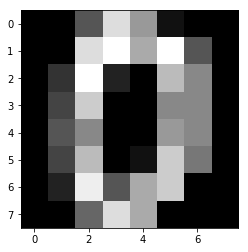

In [103]:
plt.imshow(digits.images[0,:,:],cmap='gray')

In [106]:
def browse_image(digits):
    n = len(digits.images)
    def view_image(i):
        plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
#         plt.title("Training: ", digits.target[i])
        plt.show()
    interact(view_image, i=(0,n-1))
    return

In [107]:
browse_image(digits)

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT04OTgsIGRlc2NyaXB0aW9uPXUnaScsIG1heD0xNzk2KSwgT3V0cHV0KCkpLCBfZG9tX2NsYXNzZXM9KHUnd2lkZ2V0LWludGXigKY=


### Image Browser

In [220]:
from io import BytesIO
from IPython.display import Image
from ipywidgets import interact, interactive, fixed
import matplotlib as mpl
from skimage import data, filters, io, img_as_float
import pdb

In [140]:
arr = img_as_float(data.coffee())
print(arr.min(), arr.max())

0.0 1.0


In [229]:
def arr2img(arr):
    """ Display 2d or 3d numpy array as an image."""
    if arr.ndim == 2:
        format, cmap = 'png', mpl.cm.gray
    elif arr.ndim == 3:
        format, cmap = 'jpg', None
    else:
        raise ValueError("input array should be either 2 or 3 dim")
    
    #Don't let matplotlib autoscale the color range (to the input array's min and max) 
    vmin, vmax = (0, 255) if arr.dtype=='uint8' else (0., 1.)    
    
    with BytesIO() as buffer:
        mpl.image.imsave(buffer, arr, vmin=vmin, vmax=vmax, format=format, cmap=cmap)
        out = buffer.getvalue()
    
    return Image(out)
    

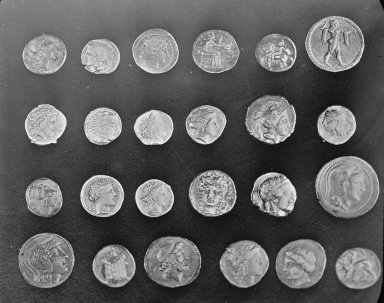

In [230]:
arr2img(data.coins())

Now let's create a simple function to edit this image. For instance, we can toggle each channel or blur the image.


In [231]:
def edit_img(arr, sigma=0.1, R=1.0, G=1.0, B=1.0):
    """ Apply a blurring to the numpy array"""
    output = filters.gaussian(arr, sigma=sigma, multichannel=True)

    colors = [R, G, B]
    if arr.ndim == 2:
        output = G * output
    elif arr.ndim > 2:
        for c in range(output.ndim):
            output[:,:,c] = colors[c] * output[:,:,c]
    display(arr2img(output))
#     return arr2img(output)
    

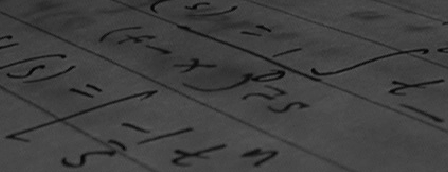

In [232]:
edit_img(data.text(), sigma=0., G=0.5);

Let's use `ipywidgets`'s interactive functionality to see the effect of these parameters

In [233]:
limits = (0., 1., 0.01)
interactive(edit_img, arr=fixed(arr), sigma=(0., 5., 0.5), R=limits, G=limits, B=limits)

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTAuMSwgZGVzY3JpcHRpb249dSdzaWdtYScsIG1heD01LjAsIHN0ZXA9MC41KSwgRmxvYXRTbGlkZXIodmFsdWU9MS4wLCDigKY=


In [234]:
data.__all__

['data_dir',
 'load',
 'astronaut',
 'binary_blobs',
 'camera',
 'checkerboard',
 'chelsea',
 'clock',
 'coffee',
 'coins',
 'horse',
 'hubble_deep_field',
 'immunohistochemistry',
 'lfw_subset',
 'logo',
 'moon',
 'page',
 'text',
 'rocket',
 'stereo_motorcycle']

In [235]:
def choose_img(name):
    global img
    arr = getattr(data, name)()
    return arr2img(arr)

In [236]:
interact(choose_img, name=sorted(set(data.__all__) - {'load', 'data_dir', 'lfw_subset', 'stereo_motorcycle'}));

aW50ZXJhY3RpdmUoY2hpbGRyZW49KERyb3Bkb3duKGRlc2NyaXB0aW9uPXUnbmFtZScsIG9wdGlvbnM9KCdhc3Ryb25hdXQnLCAnYmluYXJ5X2Jsb2JzJywgJ2NhbWVyYScsICdjaGVja2VyYm/igKY=


In [215]:
temp = data.page(); 
print(temp.ndim)
print(temp.dtype)

2
uint8


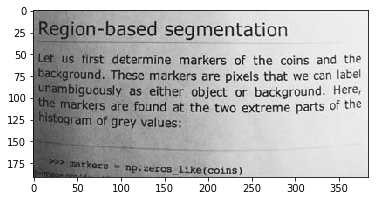

In [218]:
plt.imshow(temp,cmap=mpl.cm.gray)

In [219]:
temp.min(), temp.max()

(0, 255)

In [ ]:
def edit_image(image, sigma, R,G,B):
    new_image = 

Now, let's set the image path to the spacenet dataset datapath

## Sample dataset path

In [313]:
DATA = Path("/home/hayley/Data_Spacenet/")

# Sample dataset
sample_dir = Path("/home/hayley/Data_Spacenet/SpaceNet_Roads_Sample/")
sample_root_dirs = [sample_dir/ city for city in ["AOI_2_Vegas_Roads_Sample",  
                                                  "AOI_3_Paris_Roads_Sample", 
                                                  "AOI_4_Shanghai_Roads_Sample", 
                                                  "AOI_5_Khartoum_Roads_Sample"]
                   ]
sample_rgb_dirs = [root/"RGB-PanSharpen" for root in sample_root_dirs]
sample_vec_dirs = [root/"geojons/spacenetroads" for root in sample_root_dirs]
sample_buff_vec_dirs = [root/"geojson/buffer" for root in sample_root_dirs]     

In [286]:
def get_short_name(fname):
    """Extract a short name from pathlib.Path object to fname"""
    if isinstance(fname, str):
        fname = Path(fname)
    return "_".join(fname.name.split("_")[1:])


In [278]:
sample_vegas_rgbs = [fname for fname in sample_rgb_dirs[0].iterdir() if fname.suffix == '.tif']

In [279]:
print(str(sample_vegas_rgbs[0]))
print(short_name(sample_vegas_rgbs[0]))

/home/hayley/Data_Spacenet/SpaceNet_Roads_Sample/AOI_2_Vegas_Roads_Sample/RGB-PanSharpen/RGB-PanSharpen_AOI_2_Vegas_img1454.tif
AOI_2_Vegas_img1454.tif


In [250]:
import apls_tools

In [ ]:
apls_tools.convert_to_8Bit(

In [251]:
import rasterio

In [268]:
gmin, gmax = float('inf'), -float('inf')
for i in range(len(sample_vegas_rgbs)):
    arr = rasterio.open(sample_vegas_rgbs[i]).read()
    cmin, cmax = arr.min(), arr.max()
    if cmin < gmin:
        gmin = cmin
    if cmax > gmax:
        gmax = cmax
print("global min, max: ", gmin, ", ", gmax)

global min, max:  0 ,  2047


Affine(2.699999999993434e-06, 0.0, -115.1671176,
       0.0, -2.6999999999988997e-06, 36.1247876997)

In [267]:
data = ds.read()
print(data.shape)
print(data.min(), data.max())

(3, 1300, 1300)
0 1909


In [270]:
def get_global_min_max(fnames):
    """compute the min and max of the image arrays in the fname list"""
    gmin, gmax = float('inf'), -float('inf')
    for fname in fnames:
        arr = rasterio.open(fname).read()
        cmin, cmax = arr.min(), arr.max()
        if cmin < gmin:
            gmin = cmin
        if cmax > gmax:
            gmax = cmax
    print("global min, max: ", gmin, ", ", gmax)
    return gmin, gmax

In [271]:
get_global_min_max(sample_vegas_rgbs)

global min, max:  0 ,  2047


(0, 2047)

In [ ]:
parent = sample_vegas_rgbs
out_dir = 'RGB-PanSharpen-8bits'
i=0
for in_path in sample_vegas_rgbs:
    in_name = get_short_name(in_path)
    out_name = "_".join([out_dir,in_name])
    out_path = in_path.parent.parent /out_dir/ out_name
    print("outname: ", str(outname))
    apls_tools.convert_to_8Bit(str(in_path), str(out_path))
    
    if i>10: 
        break
    i+=1

In [301]:
def batch_convert_to_8Bit(in_rgb_dir, out_dir_name='RGB-PanSharpen-8bits', verbose=False):
    
    if isinstance(in_rgb_dir, str):
        in_rgb_dir = Path(in_rgb_dir)
        
    # set output directory
    out_rgb_dir = in_rgb_dir.parent / out_dir_name
    print("in: ", str(in_rgb_dir))
    print("out: ", str(out_rgb_dir))
    
    if not out_rgb_dir.exists():
        out_rgb_dir.mkdir()
            
    # convert each image to 8 bit
    for i,in_path in enumerate(in_rgb_dir.iterdir()):
        if in_path.suffix != '.tif': continue
        in_name = get_short_name(in_path)
        out_name = "_".join([out_dir_name,in_name])

        out_path = out_rgb_dir/ out_name
        apls_tools.convert_to_8Bit(str(in_path), str(out_path))
        
        if (verbose and i%100==0):
            print("i :", i)
            print("outname: ", str(out_name))

    

In [302]:
batch_convert_to_8Bit(sample_rgb_dirs[0],verbose=True)

in:  /home/hayley/Data_Spacenet/SpaceNet_Roads_Sample/AOI_2_Vegas_Roads_Sample/RGB-PanSharpen
out:  /home/hayley/Data_Spacenet/SpaceNet_Roads_Sample/AOI_2_Vegas_Roads_Sample/RGB-PanSharpen-8bits
i : 0
outname:  RGB-PanSharpen-8bits_AOI_2_Vegas_img1454.tif


## Convert all sample rgb images to 8bits

In [299]:
for sample_rgb_dir in sample_rgb_dirs:
    batch_convert_to_8Bit(sample_rgb_dir)

in:  /home/hayley/Data_Spacenet/SpaceNet_Roads_Sample/AOI_2_Vegas_Roads_Sample/RGB-PanSharpen
out:  /home/hayley/Data_Spacenet/SpaceNet_Roads_Sample/AOI_2_Vegas_Roads_Sample/RGB-PanSharpen-8bits
> <ipython-input-296-17923757bfd4>(12)batch_convert_to_8Bit()
-> if not out_rgb_dir.exists():


(Pdb)  q


BdbQuit: 

Now let's make sure this conversion makes sense. We can check with QGIS.


## Convert all training rgb images to 8bits

In [314]:
vegas_root = Path("/home/hayley/Data_Spacenet/AOI_2_Vegas_Roads_Train/")
paris_root = Path("/home/hayley/Data_Spacenet/AOI_3_Paris_Roads_Train/")
shanghai_root = Path("/home/hayley/Data_Spacenet/AOI_4_Shanghai_Roads_Train/")
k_root = Path("/home/hayley/Data_Spacenet/AOI_5_Khartoum_Roads_Train/")

train_root_dirs = [vegas_root, paris_root, shanghai_root, k_root]
train_rgb_dirs = [root/"RGB-PanSharpen" for root in train_root_dirs]
train_vec_dirs = [root/"geojson/spacenetroads" for root in train_root_dirs]
train_buff_vec_dirs = [root/"geojson/buffer" for root in train_root_dirs]

In [306]:
for train_rgb_dir in train_rgb_dirs:
    batch_convert_to_8Bit(train_rgb_dir, verbose=True)

in:  /home/hayley/Data_Spacenet/AOI_2_Vegas_Roads_Train/RGB-PanSharpen
out:  /home/hayley/Data_Spacenet/AOI_2_Vegas_Roads_Train/RGB-PanSharpen-8bits
i : 0
outname:  RGB-PanSharpen-8bits_AOI_2_Vegas_img352.tif
i : 100
outname:  RGB-PanSharpen-8bits_AOI_2_Vegas_img978.tif
i : 200
outname:  RGB-PanSharpen-8bits_AOI_2_Vegas_img1581.tif
i : 300
outname:  RGB-PanSharpen-8bits_AOI_2_Vegas_img1314.tif
i : 400
outname:  RGB-PanSharpen-8bits_AOI_2_Vegas_img776.tif
i : 500
outname:  RGB-PanSharpen-8bits_AOI_2_Vegas_img1139.tif
i : 600
outname:  RGB-PanSharpen-8bits_AOI_2_Vegas_img248.tif
i : 700
outname:  RGB-PanSharpen-8bits_AOI_2_Vegas_img770.tif
i : 800
outname:  RGB-PanSharpen-8bits_AOI_2_Vegas_img1393.tif
i : 900
outname:  RGB-PanSharpen-8bits_AOI_2_Vegas_img837.tif
in:  /home/hayley/Data_Spacenet/AOI_3_Paris_Roads_Train/RGB-PanSharpen
out:  /home/hayley/Data_Spacenet/AOI_3_Paris_Roads_Train/RGB-PanSharpen-8bits
i : 0
outname:  RGB-PanSharpen-8bits_AOI_3_Paris_img48.tif
i : 100
outname:  RGB

Now, let's make sure the number of 8bits files are the same as in the original training rgb images


In [307]:
from collections import Counter, defaultdict

In [ ]:
c = defaultdict(dict)

In [312]:
original_counts = dict()
converted_counts = dict()
for i,train_rgb_dir in enumerate(train_rgb_dirs):
    train_rgb_8bits_dir = train_rgb_dir.parent/'RGB-PanSharpen-8bits'
    original_counts[i] = Counter(f.suffix for f in train_rgb_dir.iterdir())
    converted_counts[i] = Counter(f.suffix for f in train_rgb_8bits_dir.iterdir())
print("Original:")
print(original_counts)

print("8bits:")
print(converted_counts)
    
    

Original:
{0: Counter({'.tif': 989}), 1: Counter({'.tif': 310}), 2: Counter({'.tif': 1198}), 3: Counter({'.tif': 283})}
8bits:
{0: Counter({'.tif': 989}), 1: Counter({'.tif': 310}), 2: Counter({'.tif': 1198}), 3: Counter({'.tif': 283})}


Perfect, so let's last double check a couple of them with QGIS to make sure the conversion is done right.


Okay, great. so now we have accomplished 16 RGB -> 8 bit RGB conversion. This will be useful for visualizing the buffer raster results.
For model training, however, we will probably use the 16 bit images since it has more information.

Before moving on, I would like to check if any of the raster images contain an invalid data. First I check which values are considered invalid from the `tif` file's metadata:

In [374]:
sample_vegas_buff_vecs = sorted(list(f for f in sample_buff_vec_dirs[0].iterdir() if f.suffix == '.geojson'))
sample_vegas_8bit_rgbs = sorted(list(f for f in (sample_rgb_dir.parent/'RGB-PanSharpen-8bits').iterdir() if f.suffix=='.tif'))
sample_vegas_16bit_rgbs = sorted(list(f for f in sample_rgb_dir.iterdir() if f.suffix=='.tif'))

In [380]:
ds_16 = rasterio.open(sample_vegas_16bit_rgbs[0])
ds_8 = rasterio.open(sample_vegas_8bit_rgbs[0])

In [383]:
print("no data values: ")
print(ds_16.nodatavals)
print(ds_8.nodatavals)

no data values: 
(None, None, None)
(None, None, None)


In [384]:
ds_16.nodata

Great, so `None` incidcates invalid/missing values in the original RGB raster images. 

## Check if there is any invalid data in the 16bit and 8bit RGB images. 
Now, let's see if any of the original 16bit RGB or processed 8bit RGB raster images contains `None`.  

In [385]:
from collections import defaultdict

In [ ]:
%timeit
nones = [] # list of filenames (pathlib Path object) that contains any invalid value
zeros = {} #key=filename, value=number of zeros
for train_rgb_dir in train_rgb_dirs:
    print("="*80)
    print(str(train_rgb_dir.parent.name))
    for i,f in enumerate(train_rgb_dir.iterdir()):
        if i%99 == 0:
            print(i)
        if f.suffix != '.tif': continue
        with rasterio.open(f, 'r') as ds:
            arr = ds.read()
            has_none = np.any(np.isnan(arr))
            num_zeros = np.sum([True if val<1e-6 else False for val in arr.ravel()])
#             pdb.set_trace()
            if has_none:
                nones.append(f)
            if num_zeros > 0:
                zeros[str(f.name)] = num_zeros
                
print("Number of files with any invalid value")
print(len(nones))

print("Number of files with any zero: ")
print(len(zeros))
        

AOI_2_Vegas_Roads_Train
0
198
297
396


In [390]:
[True if i<5 else False for i in range(10)]

[True, True, True, True, True, False, False, False, False, False]

Awesome, so there is no invalid value in the training dataset. How about value of 0 then?  I'm inspecting this in preparation for the later process of generating road-buffer masks from buffer vector files.  I'm going to check this at the same time when checking on `None` values in the above.

### Reading buffer vector data using Fiona
[reference](https://mapbox.s3.amazonaws.com/playground/perrygeo/rasterio-docs/cookbook.html#rasterizing-geojson-features)

In [332]:
import fiona

In [355]:
from rasterio.mask import mask
from rasterio.plot import reshape_as_image, reshape_as_raster

In [357]:
ds = rasterio.open(sample_vegas_8bit_rgbs[0])
ds.crs

CRS({'init': u'epsg:4326'})

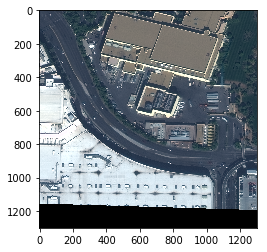

In [356]:
arr = ds.read()
plt.imshow(reshape_as_image(arr))

In [335]:
with fiona.open(sample_vegas_buff_vecs[0]) as buff_file:
    geoms = [feature['geometry'] for feature in buff_file]
rasterio##todo: set outside of geometry to burn as -inf or none etc

In [359]:
with rasterio.open(sample_vegas_8bit_rgbs[0]) as src:
#     ones = np.array(
    out_img, out_transform = mask(src, geoms, crop=True, )
    out_img
    out_meta = src.meta.copy()
out_meta.update({"driver": "GTiff",
                 "height": out_img.shape[1],
                 "width": out_img.shape[2],
                 "transform": out_transform})

with rasterio.open("./temp.tif", "w", **out_meta) as dest:
    dest.write(out_img)
    

In [371]:
with rasterio.open(sample_vegas_8bit_rgbs[0]) as src:

    src_im = reshape_as_image(src.read())
    print(np.any(np.isnan(src_im)))
    print(np.sum(np.any(src_im<1e-6)))

False
1


0 255
Counter({0: 3694014, 68: 28356, 52: 27637, 65: 27132, 66: 26809, 86: 26688, 83: 26649, 53: 26587, 67: 26428, 55: 26071, 64: 25371, 84: 24067, 85: 23827, 71: 23031, 51: 22522, 63: 22235, 87: 21294, 54: 20920, 70: 20556, 56: 20289, 69: 20284, 72: 20103, 74: 20083, 82: 19933, 73: 19432, 62: 19278, 75: 19127, 50: 18735, 61: 18333, 88: 18040, 57: 17606, 90: 17268, 81: 16747, 58: 15691, 76: 15311, 77: 15086, 80: 14917, 60: 14853, 89: 14718, 49: 14624, 79: 14586, 78: 13238, 91: 13200, 92: 12087, 94: 11970, 59: 11911, 93: 11116, 95: 8862, 48: 7562, 36: 7279, 38: 7225, 96: 7098, 97: 7060, 37: 6742, 98: 6494, 47: 6244, 35: 6033, 39: 5971, 40: 4850, 99: 4719, 34: 4358, 100: 4345, 46: 4221, 41: 4087, 101: 4081, 45: 3512, 43: 3355, 102: 3190, 103: 3092, 44: 3090, 105: 2747, 33: 2641, 42: 2575, 104: 2524, 109: 2520, 107: 2369, 113: 2363, 106: 2291, 108: 2170, 110: 2123, 116: 2037, 115: 1995, 120: 1977, 119: 1972, 117: 1957, 111: 1951, 121: 1904, 118: 1902, 114: 1893, 112: 1844, 123: 1820, 32: 

(Pdb)  c


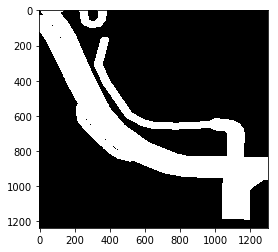

In [372]:
with rasterio.open('./temp.tif') as f:
    mask = reshape_as_image(f.read())
    print(mask.min(), mask.max())
    count = Counter(mask.ravel())
    print(count)
    pdb.set_trace()
    mask [ mask != 0] = 255
    plt.imshow(mask)

In [ ]:
def generate_buffer_vecs(road_vec_dir):
    """
    Given a path to `road_vec_dir`, generate a buffer vector file for each road vec file in that directory
    based on the road_type and num_lanes
    Args:
    - road_vec_dir (pathlib.Path): path to a directory containing spacenet road vector files (.geojson)
    Returns:
    - buff_vec_dir (pathlib.Path): path to a new directory containing the processed buffer vector files
        It is generated under the `geojson` folder called `buffer`.  This `buffer` directory contains
        buffer vector files for each road vec in the input directory.
    """
    
    
    
    